In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)

Specifying the colors to be used. These colors are selected as a colorblind-friendly palette.
Hex codes are provided.

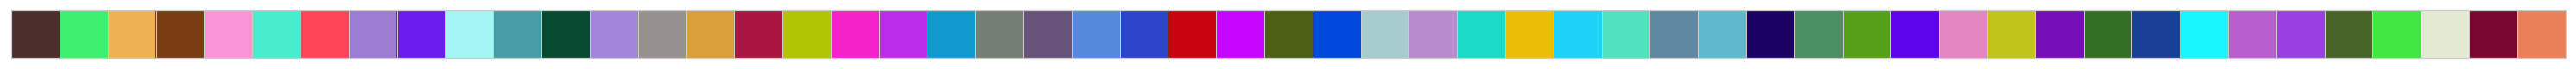

In [53]:
import random
r = lambda: random.randint(0,255)

flatui = []
for i in range(53):
    flatui.append('#%02X%02X%02X' % (r(),r(),r()))

sns.set_palette(flatui)
sns.palplot(sns.color_palette())
sns.set_style("whitegrid")

In [38]:
epoch = 174
folder_name = 'd40d5e938bb18af0f73c4a87aae30184'
fname_types = './small_gtex_30_types.npy'
fname_sybtypes = './small_gtex_30_subtypes.npy'

## Patient embedding space
Here we load the embeddings for patients and display them according to their class - here it is tissue type.

An alternative plot using a marker type as well, to make it colorblind frienly

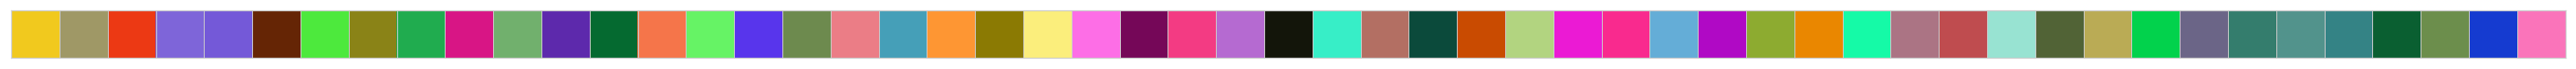

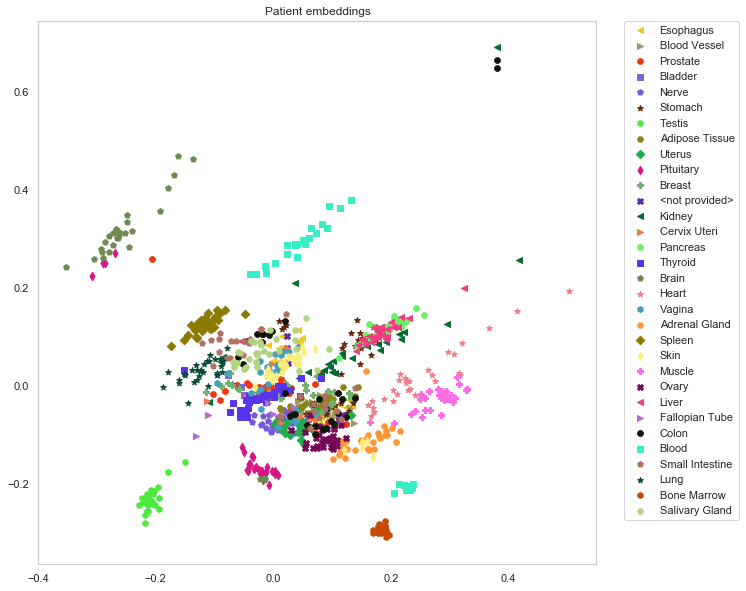

In [39]:
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

a = np.load(f'./{folder_name}/digit_epoch_{epoch}.npy')
a = pd.DataFrame(a)
a.columns = ['emb1','emb2']

types = np.load(fname_types)
a['types'] = types
mm = ['<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']*5


plt.figure(figsize=(10,10))
#sns.scatterplot(x="emb1", y="emb2", data=a,hue='types',linewidth=0)

for i in range(len(set(a['types']))):
    temp = np.array(a[a['types'] == list(set(a['types']))[i]])
    plt.scatter(temp[:,0], temp[:,1],c=flatui[i],marker=mm[i],label=list(set(a['types']))[i])


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Patient embeddings')
plt.grid(False)

The embeddings can also be visualised by tissue subtype.


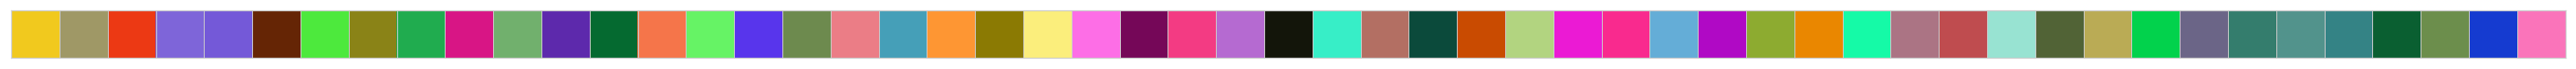

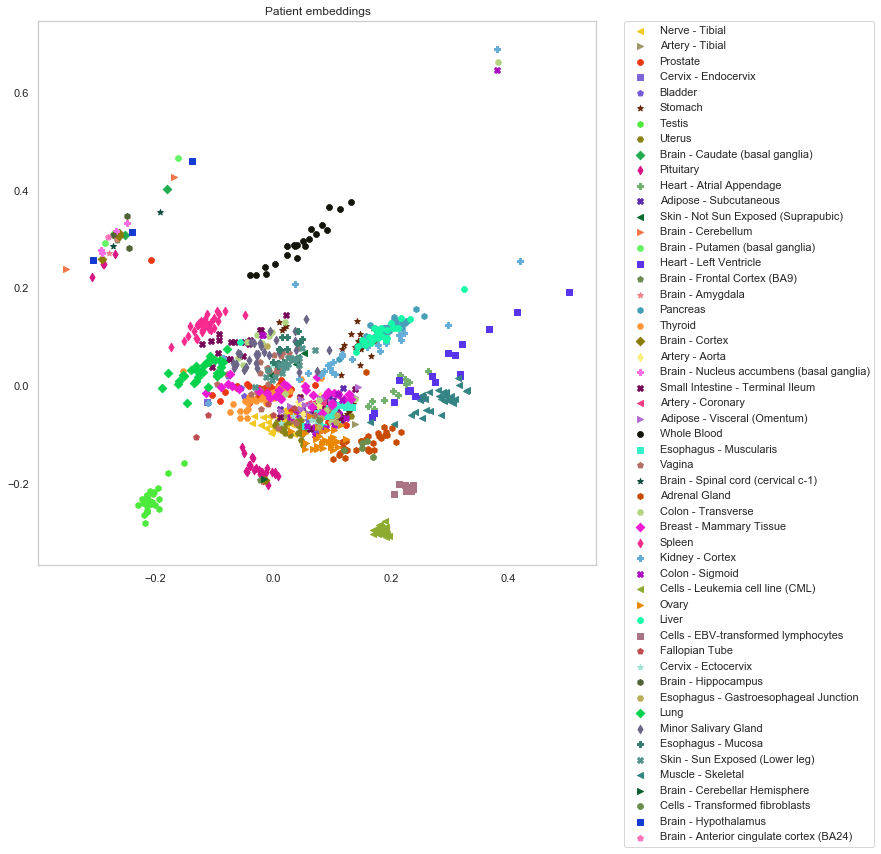

In [40]:
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

a = np.load(f'./{folder_name}/digit_epoch_{epoch}.npy')
a = pd.DataFrame(a)
a.columns = ['emb1','emb2']

types = np.load('./small_gtex_30_subtypes.npy')
a['types'] = types
mm = ['<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']*5


plt.figure(figsize=(10,10))
#sns.scatterplot(x="emb1", y="emb2", data=a,hue='types',linewidth=0)

for i in range(len(set(a['types']))):
    temp = np.array(a[a['types'] == list(set(a['types']))[i]])
    plt.scatter(temp[:,0], temp[:,1],c=flatui[i],marker=mm[i],label=list(set(a['types']))[i])


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Patient embeddings')
plt.grid(False)

### Meshgrid
We generate a meshgrid over the embedding space and generate hypothetical patients. We can measure the average euclidean distance for each of these fake patients to each class. This will provide a view of how the embedding space is stratified with respect to various classes.

In [45]:
original_data = np.log10(np.load(f'./{folder_name}/small_gtex_30.npy')+1)
types = np.load('./small_gtex_30_types.npy')
subtypes = np.load('./small_gtex_30_subtypes.npy')



Here is the code for one such plot

Text(0.5, 1.0, 'Euclidean distance to tissue type Esophagus - Gastroesophageal Junction')

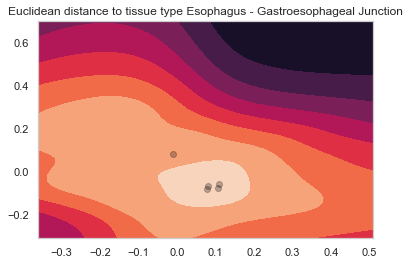

In [46]:
generated = np.load(f'./{folder_name}/generated_mesh_samples.npy')
generated = generated.reshape((generated.shape[0], generated.shape[1])) #reshaping (the pytorch Tensor made it wonky)
selected_tissues = list(set(subtypes))[43]

X_mesh = np.load(f'./{folder_name}/meshgrid_x.npy')
Y_mesh = np.load(f'./{folder_name}/meshgrid_y.npy')



temp = []
for g_pt in generated:
    ### average euclidean distance to the patients of a certain tissue type
    temp.append(np.mean(np.linalg.norm(g_pt-original_data[subtypes == selected_tissues],axis=1)))
only_type = a[a['types']==selected_tissues]
temp = np.array(temp).reshape(X_mesh.shape)
temp = np.max(temp)-temp
plt.contourf(X_mesh, Y_mesh, temp)

plt.scatter(only_type['emb1'], only_type['emb2'],alpha=0.25,c='black')
plt.title(f'Euclidean distance to tissue type {selected_tissues}')

Here is the code for a tile of such plots
This takes time!

tissues in the space: Ovary, Liver, Fallopian Tube, Colon, Blood, Small Intestine, Lung, Bone Marrow, Salivary Gland


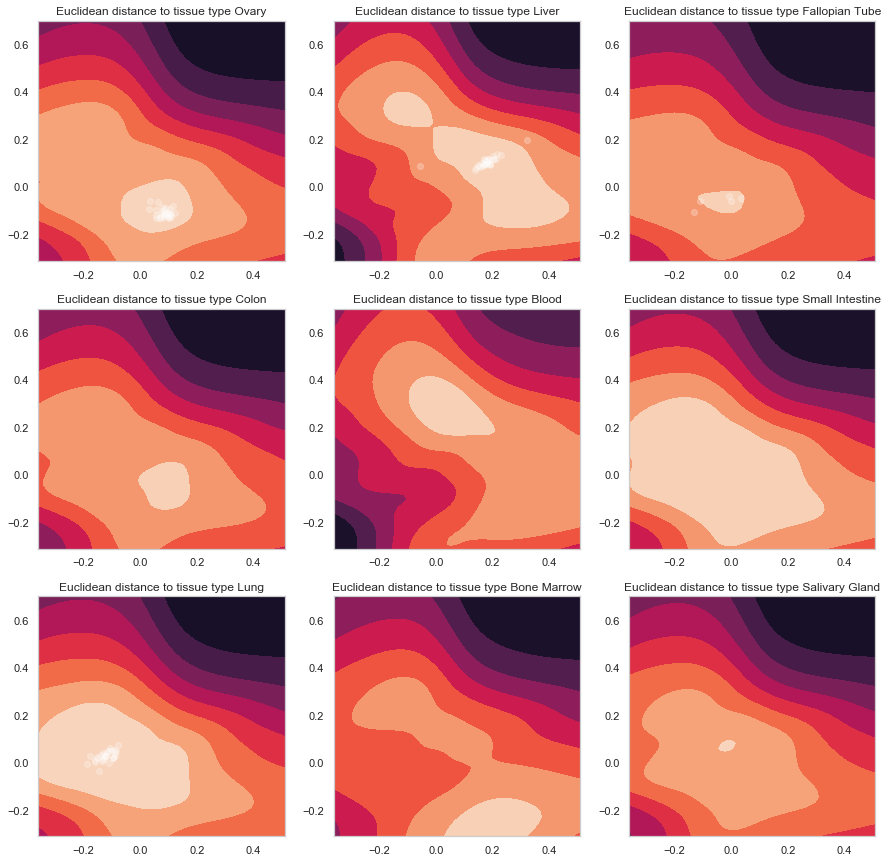

In [51]:
nb_tissues = 9

generated = np.load(f'./{folder_name}/generated_mesh_samples.npy')
generated = generated.reshape((generated.shape[0], generated.shape[1])) #reshaping (the pytorch Tensor made it wonky)


pretty_tissues = list(set(types))[-nb_tissues:]
selected_tissues = pretty_tissues
print(f"tissues in the space: {', '.join(pretty_tissues)}")
      

## loading the mesh
X_mesh = np.load(f'./{folder_name}/meshgrid_x.npy')
Y_mesh = np.load(f'./{folder_name}/meshgrid_y.npy')

nrow = int(np.floor(np.sqrt(nb_tissues)))
ncol = int(np.floor(np.sqrt(nb_tissues)))

fig, ax = plt.subplots(nrows=nrow, ncols=ncol,figsize=(15,15))

for i in range(nb_tissues):
    r, c = (i) // nrow, (i) % ncol
    #calculating the euclidean distance for each sample on the mesh to one digit
    temp = []
    for g_pt in generated:
        ### average euclidean distance to the patients of a certain tissue type
        temp.append(np.mean(np.linalg.norm(g_pt-original_data[types == selected_tissues[i]],axis=1)))
    only_type = a[a['types']==selected_tissues[i]]
    temp = np.array(temp).reshape(X_mesh.shape)
    temp = np.max(temp)-temp #inversing color scale
    ax[r,c].contourf(X_mesh, Y_mesh, temp)
    ax[r,c].scatter(only_type['emb1'], only_type['emb2'],alpha=0.25,c='black')
    ax[r,c].title.set_text(f'Euclidean distance to tissue type {pretty_tissues[i]}')
    

['Nerve' 'Nerve']
[[1.         0.97322347]
 [0.97322347 1.        ]]


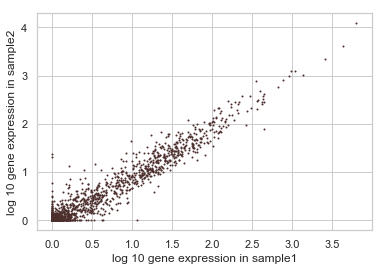

In [54]:
predictions = np.load(f'./{folder_name}/predictions.npy')

nb_genes_sample = 12500
selected_genes = np.random.permutation(np.arange(predictions.shape[1]))[:2500]


print(types[4:6])

plt.scatter(original_data[0][selected_genes],original_data[1][selected_genes],s=1)
plt.xlabel('log 10 gene expression in sample1')
plt.ylabel('log 10 gene expression in sample2')
print (np.corrcoef((original_data[0][selected_genes],original_data[1][selected_genes])))

['Nerve' 'Nerve']
[[1.        0.9592202]
 [0.9592202 1.       ]]


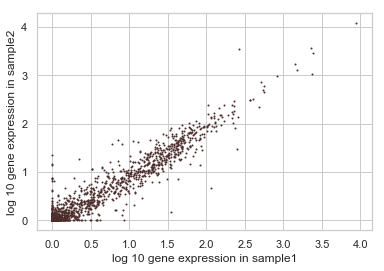

In [55]:
predictions = np.load(f'./{folder_name}/predictions.npy')

nb_genes_sample = 12500
selected_genes = np.random.permutation(np.arange(predictions.shape[1]))[:2500]


print(types[4:6])

plt.scatter(original_data[0][selected_genes],original_data[1][selected_genes],s=1)
plt.xlabel('log 10 gene expression in sample1')
plt.ylabel('log 10 gene expression in sample2')
print (np.corrcoef((original_data[0][selected_genes],predictions[0][selected_genes])))

In [56]:
corrs = np.corrcoef(original_data[types==list(set(types))[0]])
corrs = corrs.reshape((corrs.shape[0]*corrs.shape[1],))
comparison = np.repeat('within_class',corrs.shape[0])
tissue = np.repeat(list(set(types))[0],corrs.shape[0])

temp_cor = []
temp_comp = []
temp_tissue = []


for t in list(set(types))[1:]:


    temp_cor = np.corrcoef(original_data[types==t])
    temp_cor = temp_cor.reshape((temp_cor.shape[0]*temp_cor.shape[1],))
    temp_comp = np.repeat('within_class',temp_cor.shape[0])
    
    temp_tissue = np.repeat(t,temp_cor.shape[0])
    corrs = np.hstack((corrs, temp_cor))
    comparison = np.hstack((comparison,temp_comp))
    tissue = np.hstack((tissue,temp_tissue))


temp_cor = []
temp_tissue = []
temp_comp = []
for i in range(original_data.shape[0]):
    temp_cor.append(np.corrcoef(original_data[i],predictions[i])[0,1])
    temp_tissue.append(types[i])
    temp_comp.append('pred_to_original')
    

corrs = np.hstack((corrs, temp_cor))
comparison = np.hstack((comparison,temp_comp))
tissue = np.hstack((tissue,temp_tissue))


correlations = pd.DataFrame([corrs,comparison,tissue]).T
correlations.columns = ['correlation','comparison','tissue']
correlations['correlation'] = correlations['correlation'].astype(float)
correlations = correlations[np.logical_not(correlations['correlation']==1)]


Text(0.5, 1.0, 'Correlation of gene expression between samples of the same tissue type and between a sample and its reconstruction')

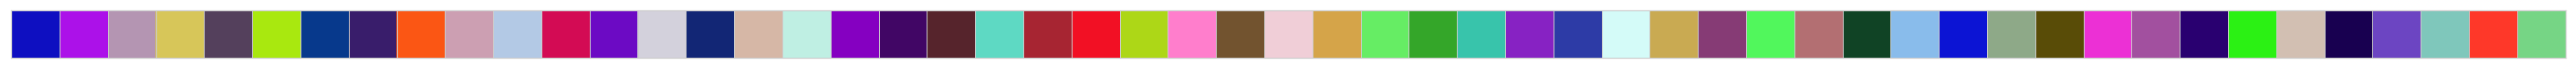

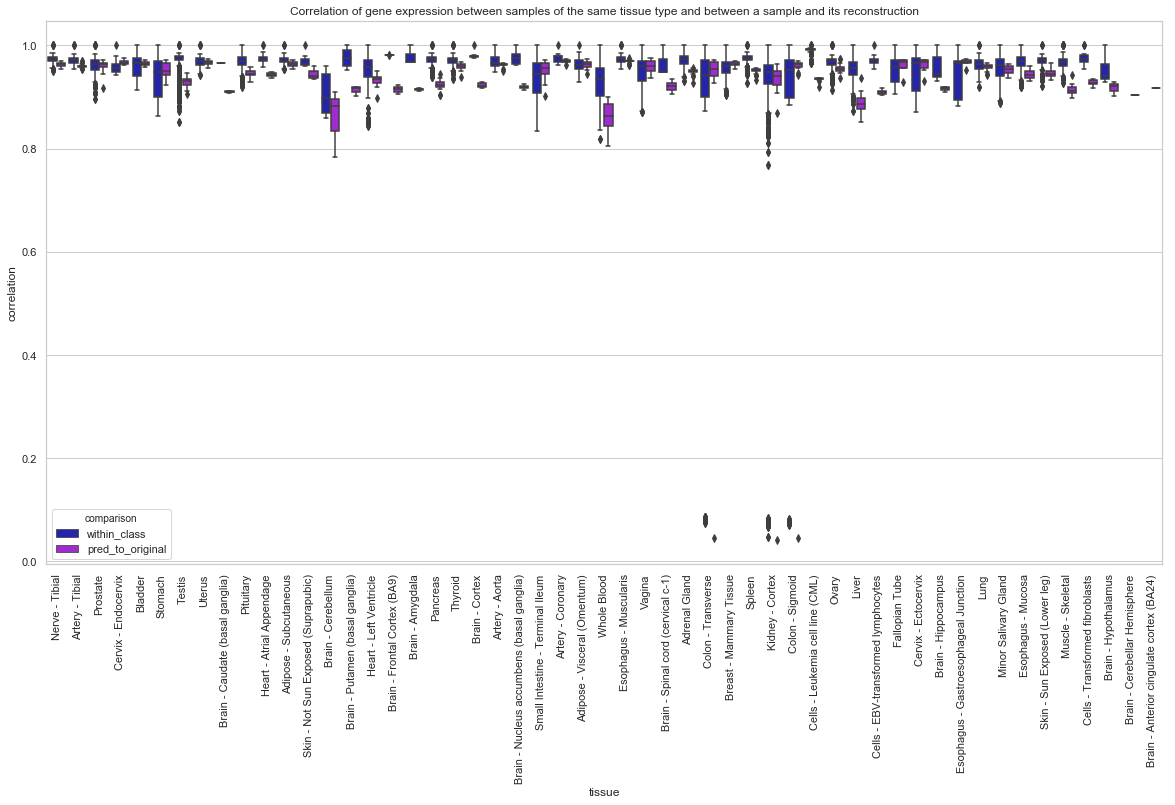

In [112]:
import random
r = lambda: random.randint(0,255)

flatui = []
for i in range(53):
    flatui.append('#%02X%02X%02X' % (r(),r(),r()))

sns.set_palette(flatui)
sns.palplot(sns.color_palette())
sns.set_style("whitegrid")


plt.figure(figsize=(20,10))
sns.boxplot(data = correlations, x='tissue',y='correlation',hue='comparison')
plt.xticks(rotation=90)
plt.title('Correlation of gene expression between samples of the same tissue type and between a sample and its reconstruction')

### Checking the correlations between the reconstructed sample and the original and within one tissue class
Same as above only done by tissue subtypes

In [59]:
corrs = np.corrcoef(original_data[subtypes==list(set(subtypes))[0]])
corrs = corrs.reshape((corrs.shape[0]*corrs.shape[1],))
comparison = np.repeat('within_class',corrs.shape[0])
tissue = np.repeat(list(set(subtypes))[0],corrs.shape[0])

temp_cor = []
temp_comp = []
temp_tissue = []


for t in list(set(subtypes))[1:]:

    temp_cor = np.corrcoef(original_data[subtypes==t])
    if subtypes[subtypes==t].shape[0] == 1:
        temp_cor = np.array(temp_cor).reshape((1,))
    else:
        temp_cor = temp_cor.reshape((temp_cor.shape[0]*temp_cor.shape[1],))
    temp_comp = np.repeat('within_class',temp_cor.shape[0])
    
    temp_tissue = np.repeat(t,temp_cor.shape[0])
    corrs = np.hstack((corrs, temp_cor))
    comparison = np.hstack((comparison,temp_comp))
    tissue = np.hstack((tissue,temp_tissue))


temp_cor = []
temp_tissue = []
temp_comp = []
for i in range(original_data.shape[0]):
    temp_cor.append(np.corrcoef(original_data[i],predictions[i])[0,1])
    temp_tissue.append(subtypes[i])
    temp_comp.append('pred_to_original')
    

corrs = np.hstack((corrs, temp_cor))
comparison = np.hstack((comparison,temp_comp))
tissue = np.hstack((tissue,temp_tissue))


correlations = pd.DataFrame([corrs,comparison,tissue]).T
correlations.columns = ['correlation','comparison','tissue']
correlations['correlation'] = correlations['correlation'].astype(float)
correlations = correlations[np.logical_not(correlations['correlation']==1)]


Text(0.5, 1.0, 'Correlation of gene expression between samples of the same tissue type and between a sample and its reconstruction')

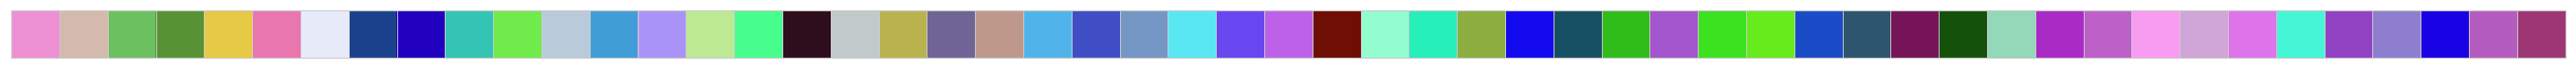

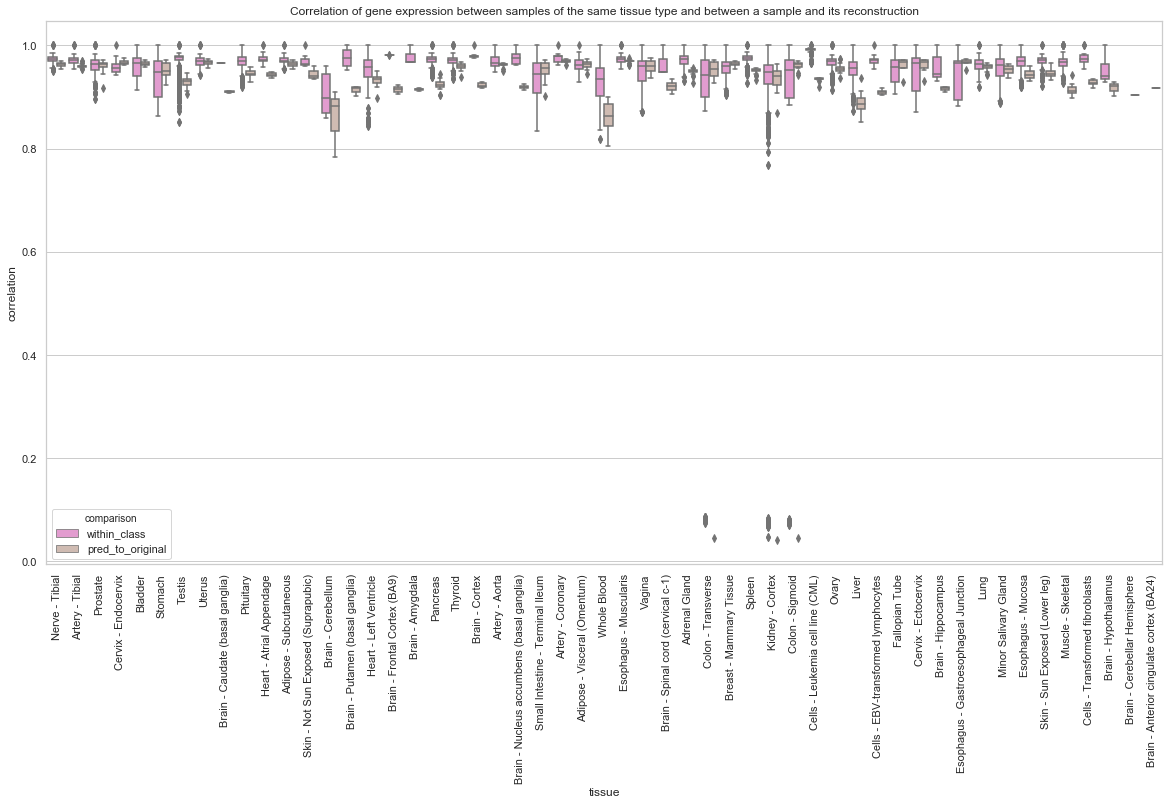

In [60]:
import random
r = lambda: random.randint(0,255)

flatui = []
for i in range(53):
    flatui.append('#%02X%02X%02X' % (r(),r(),r()))

sns.set_palette(flatui)
sns.palplot(sns.color_palette())
sns.set_style("whitegrid")

plt.figure(figsize=(20,10))
sns.boxplot(data = correlations, x='tissue',y='correlation',hue='comparison')
plt.xticks(rotation=90)
plt.title('Correlation of gene expression between samples of the same tissue type and between a sample and its reconstruction')

# Gene embeddings
Here we look at embedding space of genes. 
Gene embedding space allows to see the relationships that are captured by the factorized embeddings.

Here we load the gene embeddings and color them according to their mean value for each tissue type

In [61]:
a = np.load(f'./{folder_name}/pixel_epoch_{epoch}.npy')
a = pd.DataFrame(a)

a.columns = ['emb1','emb2']


Text(0.5, 1.0, '')

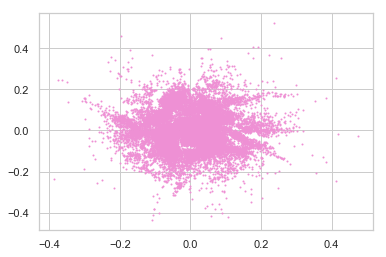

In [62]:
plt.scatter(a['emb1'], a['emb2'],s=1)
plt.title('')

In [63]:
xenafile = pd.read_csv(f'./{folder_name}/small_gtex_30.csv')

In [86]:
gene_names = xenafile.columns[2:-7]
gene_names = [i.split('.')[0] for i in list(gene_names)]

In [87]:
tf = pd.read_csv('./TF_gene_attribute_matrix.txt',sep='\t')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
tf.head()

,#,#.1,GeneSym,ARID3A,ATF1,ATF2,ATF3,BACH1,BATF,BCL11A,...,ZC3H11A,ZEB1,ZKSCAN1,ZMIZ1,ZNF143,ZNF217,ZNF263,ZNF274,ZNF384,ZZZ3
0,#,#,NaN,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
1,GeneSym,NaN,GeneID/GeneID,1820,466,1386,467,571,10538,53335,...,9877,6935,7586,57178,7702,7764,10127,10782,171017,26009
2,A1BG,na,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,A1BG-AS1,na,503538,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A1CF,na,29974,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [104]:
TFs = tf.columns
TFs = TFs[3:]

gene_IDs = tf['#']
gene_IDs = gene_IDs[2:]

In [105]:
tf = tf[TFs].iloc[2:,]

In [106]:
tf.columns = TFs
tf.index = gene_IDs

In [107]:
tf.head()

,ARID3A,ATF1,ATF2,ATF3,BACH1,BATF,BCL11A,BCL3,BCLAF1,BDP1,...,ZC3H11A,ZEB1,ZKSCAN1,ZMIZ1,ZNF143,ZNF217,ZNF263,ZNF274,ZNF384,ZZZ3
#,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG-AS1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1CF,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [81]:
mart = pd.read_csv('mart_export.txt',sep='\t')

In [82]:
mart.head()

,Gene stable ID,Transcript stable ID,Gene name
0,ENSG00000210049,ENST00000387314,MT-TF
1,ENSG00000211459,ENST00000389680,MT-RNR1
2,ENSG00000210077,ENST00000387342,MT-TV
3,ENSG00000210082,ENST00000387347,MT-RNR2
4,ENSG00000209082,ENST00000386347,MT-TL1


['ENSG00000242268',
 'ENSG00000259041',
 'ENSG00000270112',
 'ENSG00000167578',
 'ENSG00000278814',
 'ENSG00000078237',
 'ENSG00000269416',
 'ENSG00000263642',
 'ENSG00000146083',
 'ENSG00000158486',
 'ENSG00000273639',
 'ENSG00000198242',
 'ENSG00000231981',
 'ENSG00000269475',
 'ENSG00000134108',
 'ENSG00000261030',
 'ENSG00000172137',
 'ENSG00000276644',
 'ENSG00000240423',
 'ENSG00000271616',
 'ENSG00000234881',
 'ENSG00000236040',
 'ENSG00000231105',
 'ENSG00000094963',
 'ENSG00000182141',
 'ENSG00000280143',
 'ENSG00000251334',
 'ENSG00000231112',
 'ENSG00000258610',
 'ENSG00000264981',
 'ENSG00000275265',
 'ENSG00000185105',
 'ENSG00000233540',
 'ENSG00000102174',
 'ENSG00000166391',
 'ENSG00000232001',
 'ENSG00000270469',
 'ENSG00000225275',
 'ENSG00000234253',
 'ENSG00000070087',
 'ENSG00000262950',
 'ENSG00000255420',
 'ENSG00000280038',
 'ENSG00000153561',
 'ENSG00000251538',
 'ENSG00000269148',
 'ENSG00000253438',
 'ENSG00000235411',
 'ENSG00000179262',
 'ENSG00000278099',


In [2]:
(500*500)+(500*250)+(250*100)+(100*50)+(50*25)+(25*10)+(10*1)*4

406540

In [5]:
100*5*4

2000